In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
df = train_data.copy()
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
df.dropna(inplace=True)
df.drop('Name', axis=1, inplace = True)

In [5]:
df['PassengerId'] = df['PassengerId'].str[5:7]
df['Cabin'] = df['Cabin'].str[-1]

In [6]:
df = pd.get_dummies(df, columns = ['PassengerId', 'Cabin', 'HomePlanet', 'Destination'])

In [7]:
categorical = [i for i in df.columns if df[i].dtypes == bool]
categorical.append('VIP')
categorical.append('CryoSleep')

In [8]:
for i in categorical:
    
    df[i] = (df[i] == True).astype(int)
df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerId_01,...,PassengerId_07,PassengerId_08,Cabin_P,Cabin_S,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,1,0,0,1,0,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,...,0,0,0,1,1,0,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,...,0,0,0,1,0,1,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,1,...,0,0,1,0,0,1,0,1,0,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,1,1,0,0,0,1,0
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1,...,0,0,0,1,1,0,0,0,0,1
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,1,...,0,0,0,1,0,1,0,1,0,0


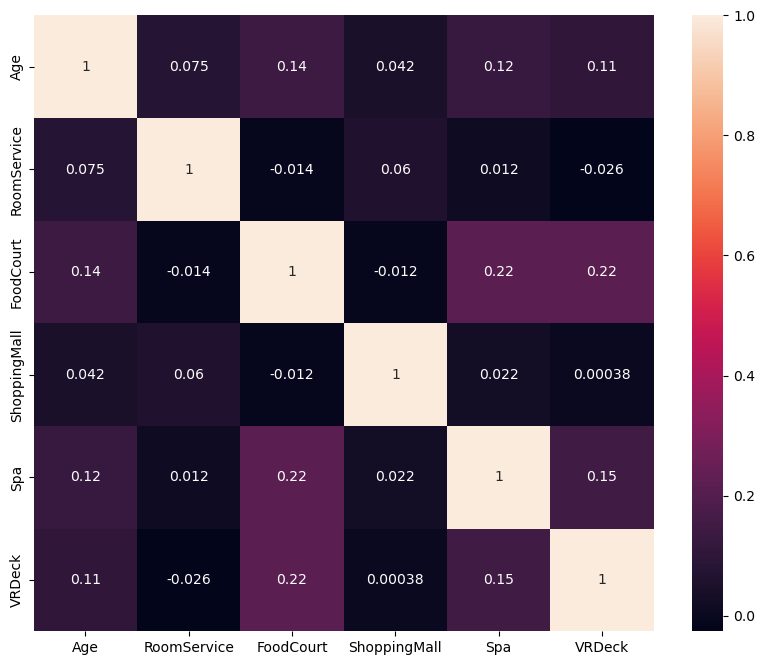

In [9]:
numerical = [i for i in df.columns if df[i].dtypes == float]

fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(df[numerical].corr(), annot=True)

In [10]:
X = df.drop('Transported', axis = 1)
y = df['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
X[numerical] = (X[numerical] - X[numerical].mean()) / X[numerical].std()

In [12]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb = XGBClassifier()
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model.score(X_test, y_test)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


0.8146747352496218

## Creating a submission

In [14]:
test = test_data.copy()

In [15]:
test['PassengerId'] = test['PassengerId'].str[-2:]
test['Cabin'] = test['Cabin'].str[-1]
test.drop('Name', axis=1, inplace = True)

In [16]:
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [17]:
test.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [18]:
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='mean')



categorical = [i for i in test.columns if test[i].dtypes == object]
numerical = [i for i in test.columns if test[i].dtypes == float]
categorical.remove('PassengerId')
categorical

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

In [19]:
test[categorical] = cat_imputer.fit_transform(test[categorical])
test[numerical] = num_imputer.fit_transform(test[numerical])
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,01,Earth,True,S,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0
1,01,Earth,False,S,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0
2,01,Europa,True,S,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0
3,01,Europa,False,S,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0
4,01,Earth,False,S,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,02,Earth,True,S,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0
4273,01,Earth,False,S,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0
4274,01,Mars,True,P,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0
4275,01,Europa,False,P,TRAPPIST-1e,28.658146,False,0.0,2680.0,0.0,0.0,523.0


In [20]:
test = pd.get_dummies(test, columns = ['PassengerId', 'Cabin', 'HomePlanet', 'Destination'])

In [21]:
features = [i for i in test.columns if ((test[i].dtypes == bool) or (test[i].dtypes == object))]

for f in features:
    test[f] = (test[f] == True).astype(int)
test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId_01,PassengerId_02,...,PassengerId_07,PassengerId_08,Cabin_P,Cabin_S,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,27.000000,0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,1,1,0,0,0,0,1
1,0,19.000000,0,0.0,9.0,0.0,2823.0,0.0,1,0,...,0,0,0,1,1,0,0,0,0,1
2,1,31.000000,0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,1,0,1,0,1,0,0
3,0,38.000000,0,0.0,6652.0,0.0,181.0,585.0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,0,20.000000,0,10.0,0.0,635.0,0.0,0.0,1,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.000000,0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,1,1,0,0,0,0,1
4273,0,42.000000,0,0.0,847.0,17.0,10.0,144.0,1,0,...,0,0,0,1,1,0,0,0,0,1
4274,1,28.658146,0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,0,1,0,0,0,1,1,0,0
4275,0,28.658146,0,0.0,2680.0,0.0,0.0,523.0,1,0,...,0,0,1,0,0,1,0,0,0,1


In [22]:
preds = best_model.predict(test)

In [23]:
submission['Transported'] = (preds == 1)
submission.to_csv('submission_cv.csv',  index=False)

###  Public Score

#### 0.79144